# Rede neural recorrente - classificação

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import imdb

In [ ]:
#Parâmetros para base de dados
#20.000 palavras para todos os textos da base de dados

number_of_words = 20000
max_len = 100

In [ ]:
number_of_words

20000

In [ ]:
max_len

100

In [ ]:
#Carregando a base de dados IMDB
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=number_of_words)

In [ ]:
X_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 82

In [ ]:
y_train

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [ ]:
X_test

array([list([1, 591, 202, 14, 31, 6, 717, 10, 10, 18142, 10698, 5, 4, 360, 7, 4, 177, 5760, 394, 354, 4, 123, 9, 1035, 1035, 1035, 10, 10, 13, 92, 124, 89, 488, 7944, 100, 28, 1668, 14, 31, 23, 27, 7479, 29, 220, 468, 8, 124, 14, 286, 170, 8, 157, 46, 5, 27, 239, 16, 179, 15387, 38, 32, 25, 7944, 451, 202, 14, 6, 717]),
       list([1, 14, 22, 3443, 6, 176, 7, 5063, 88, 12, 2679, 23, 1310, 5, 109, 943, 4, 114, 9, 55, 606, 5, 111, 7, 4, 139, 193, 273, 23, 4, 172, 270, 11, 7216, 10626, 4, 8463, 2801, 109, 1603, 21, 4, 22, 3861, 8, 6, 1193, 1330, 10, 10, 4, 105, 987, 35, 841, 16873, 19, 861, 1074, 5, 1987, 17975, 45, 55, 221, 15, 670, 5304, 526, 14, 1069, 4, 405, 5, 2438, 7, 27, 85, 108, 131, 4, 5045, 5304, 3884, 405, 9, 3523, 133, 5, 50, 13, 104, 51, 66, 166, 14, 22, 157, 9, 4, 530, 239, 34, 8463, 2801, 45, 407, 31, 7, 41, 3778, 105, 21, 59, 299, 12, 38, 950, 5, 4521, 15, 45, 629, 488, 2733, 127, 6, 52, 292, 17, 4, 6936, 185, 132, 1988, 5304, 1799, 488, 2693, 47, 6, 392, 173, 4, 2, 4378,

In [ ]:
y_test

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [ ]:
X_train.shape

(25000,)

In [ ]:
X_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 19193,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 10311,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 12118,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,

In [ ]:
#Analise de sentimento

y_train

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [ ]:
len(X_train[0])

218

In [ ]:
len(X_train[1])

189

In [ ]:
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_len)
X_train

array([[1415,   33,    6, ...,   19,  178,   32],
       [ 163,   11, 3215, ...,   16,  145,   95],
       [1301,    4, 1873, ...,    7,  129,  113],
       ...,
       [  11,    6, 4065, ...,    4, 3586,    2],
       [ 100, 2198,    8, ...,   12,    9,   23],
       [  78, 1099,   17, ...,  204,  131,    9]])

In [ ]:
len(X_train[0])

100

In [ ]:
len(X_train[1])

100

In [ ]:
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_len)
X_test

array([[   0,    0,    0, ...,   14,    6,  717],
       [   6,  976, 2078, ...,  125,    4, 3077],
       [   4, 5673,    7, ...,    9,   57,  975],
       ...,
       [   0,    0,    0, ...,   21,  846, 5518],
       [   0,    1,   11, ..., 2302,    7,  470],
       [  56,   96,  346, ...,   34, 2005, 2643]])

# Modelo - Rede neural recorrente

**Naive bayes pode ser usado para pln**

In [ ]:
#100 palavras

X_train.shape[1]

100

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=number_of_words, output_dim=128, input_shape=(X_train.shape[1],)))
model.add(tf.keras.layers.LSTM(units=128, activation='tanh'))
model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_train, epochs=55, batch_size=128)

Train on 25000 samples
Epoch 1/55
25000/25000 [==============================] - 17s 660us/sample - loss: 0.6092 - accuracy: 0.6933
Epoch 2/55
25000/25000 [==============================] - 7s 297us/sample - loss: 0.5022 - accuracy: 0.8560
Epoch 3/55
25000/25000 [==============================] - 7s 298us/sample - loss: 0.4510 - accuracy: 0.8871
Epoch 4/55
25000/25000 [==============================] - 8s 305us/sample - loss: 0.4111 - accuracy: 0.9046
Epoch 5/55
25000/25000 [==============================] - 8s 307us/sample - loss: 0.3749 - accuracy: 0.9179
Epoch 6/55
25000/25000 [==============================] - 8s 304us/sample - loss: 0.3443 - accuracy: 0.9286
Epoch 7/55
25000/25000 [==============================] - 7s 289us/sample - loss: 0.3154 - accuracy: 0.9386
Epoch 8/55
25000/25000 [==============================] - 7s 290us/sample - loss: 0.2896 - accuracy: 0.9473
Epoch 9/55
25000/25000 [==============================] - 7s 287us/sample - loss: 0.2680 - accuracy: 0.9517
Epoc

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 128)          2560000   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 2,691,715
Trainable params: 2,691,715
Non-trainable params: 0
_________________________________________________________________


# Avaliando o modelo

In [ ]:
test_loss, test_acurracy = model.evaluate(X_test, y_test)

6250/6250 [==============================] - 1s 170us/sample - loss: 0.8907 - accuracy: 0.7962


In [ ]:
print("Test acurracy: {}".format(test_acurracy))

Test acurracy: 0.7961599826812744


In [ ]:
test_loss

0.8907031660079956

# Curva roc

In [ ]:
df = pd.DataFrame(model.history.history)
df

,loss,accuracy
0,0.609170,0.69328
1,0.502162,0.85596
2,0.451011,0.88712
3,0.411059,0.90460
4,0.374913,0.91792
5,0.344268,0.92864
6,0.315446,0.93860
7,0.289561,0.94732
8,0.268017,0.95172
9,0.245629,0.95808


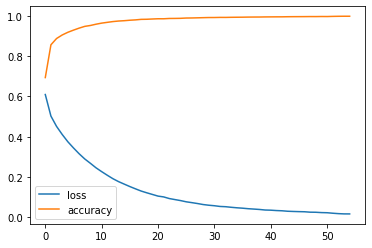

In [ ]:
df[["loss", "accuracy"]].plot()
plt.show()

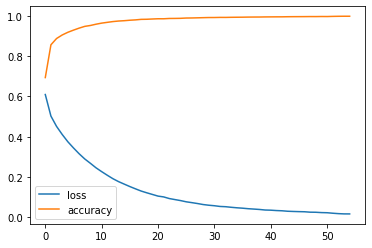

In [ ]:
df[["loss", "accuracy"]].plot()
plt.show()